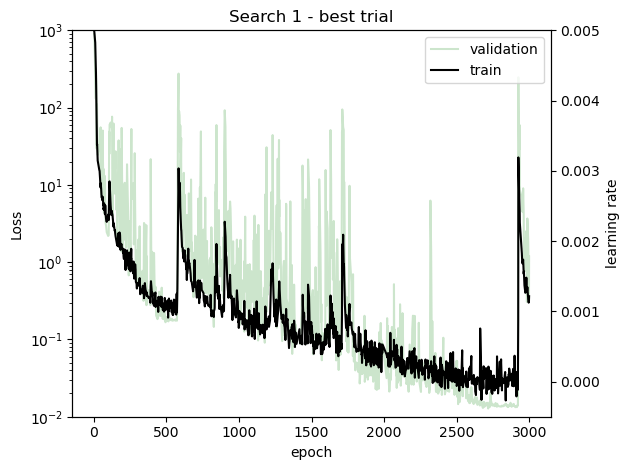

In [72]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

# Structure paths for exampls as 
# paths = [
#     loss,
#     lr,
# ]
# desc = corresponding descriptions for the legend.

paths = [
    Path('../multirun/2022-12-24/08-08-21/0_tensorboard_184_epoch_loss_val.csv'),
    Path('../multirun/2022-12-24/08-08-21/0_tensorboard_184_epoch_loss_train.csv'),
    Path('../multirun/2022-12-24/08-08-21/0_tensorboard_184_lr.csv'),
]

descs = [
    "validation",
    "train",
    "lr",
]

colors = [
    'green',
    'k',
    'darkorange'
]

title = "Search 1 - best trial"

fig, ax1 = plt.subplots()

# Losses
data = pd.read_csv(paths[0])
p1, = ax1.plot(data['Step'], data['Value'], label=descs[0], color=colors[0], alpha=0.2)
data = pd.read_csv(paths[1])
p2, = ax1.plot(data['Step'], data['Value'], label=descs[1], color=colors[1])
ax1.set_yscale('log')
ax1.set_ylim(bottom=1e-2, top=1e3)
ax1.set_ylabel("Loss")
ax1.set_xlabel("epoch")

# LR
ax2 = ax1.twinx()
data = pd.read_csv(paths[1])
p3, = ax2.plot(data['Step'], data['Value'], label=descs[1], color=colors[2])
ax2.set_ylabel("learning rate")

ax2.yaxis.label.set_color(p2.get_color())
ax2.tick_params(axis='y', colors=p2.get_color())
ax2.set_ylim([-0.0005, 0.005])

ax1.legend(handles=[p1, p2], loc='upper right')

ax1.set_title(title)

plt.tight_layout()
plt.show()

In [77]:
Path(f"outputs/plot-from-csv/").mkdir(parents=True, exist_ok=True)

format = "pdf"

fig.savefig(f"outputs/plot-from-csv/{'-'.join(paths[0].stem.split('_')[:3])}.{format}", format=format)